# Country Location

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data = pd.read_csv('CountriesLocation.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


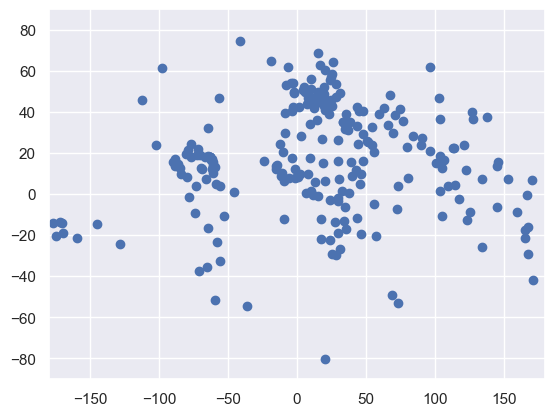

In [3]:
#Ploting the Longtitude and Latitude columns. 
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

#### Feature Selection

In [4]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

In [5]:
kmeans = KMeans(7)

In [6]:
kmeans.fit(x)

D:\Anaconda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7)

### Clustering Resutls

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

D:\Anaconda\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 5, 2, 0, 0, 0, 1, 3, 0, 6, 5, 4, 5, 2, 4, 0, 0, 5, 0, 5, 5,
       1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 3, 3, 2, 4, 1, 5, 5, 0, 3, 1, 5, 5,
       5, 5, 6, 2, 5, 2, 2, 2, 2, 2, 0, 0, 0, 0, 5, 2, 0, 2, 0, 2, 0, 5,
       0, 0, 5, 0, 4, 3, 0, 0, 4, 5, 0, 0, 0, 5, 5, 5, 5, 5, 0, 2, 2, 2,
       4, 2, 1, 5, 2, 0, 2, 0, 4, 0, 1, 4, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       4, 1, 1, 5, 1, 1, 3, 2, 4, 0, 1, 1, 0, 5, 0, 2, 0, 1, 5, 0, 0, 0,
       1, 2, 0, 0, 0, 5, 1, 2, 4, 0, 5, 0, 1, 0, 1, 4, 5, 0, 2, 5, 5, 4,
       5, 4, 5, 4, 5, 2, 6, 0, 0, 1, 4, 4, 1, 1, 2, 6, 3, 4, 4, 4, 0, 2,
       4, 0, 3, 0, 6, 1, 0, 1, 5, 0, 0, 5, 5, 5, 1, 3, 5, 4, 5, 2, 0, 5,
       5, 2, 0, 5, 2, 0, 0, 0, 5, 2, 5, 0, 2, 5, 5, 1, 1, 1, 4, 6, 2, 0,
       0, 4, 5, 5, 0, 3, 2, 1, 0, 2, 2, 2, 2, 1, 4, 6, 6, 5, 5, 5, 5])

In [8]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,5
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,6
237,Yemen,47.586762,15.909280,5
238,South Africa,25.083901,-29.000341,5
239,Zambia,27.774759,-13.458242,5


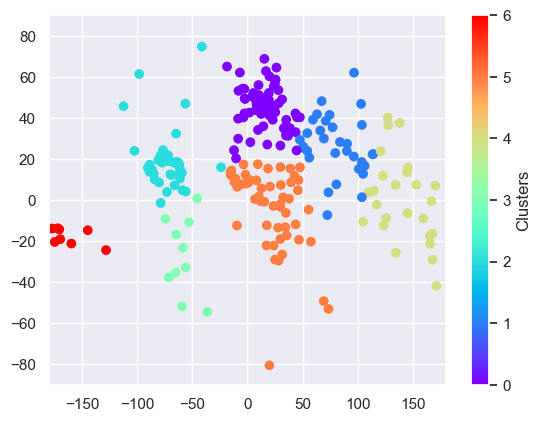

In [9]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.colorbar(label='Clusters')
plt.show()

In [10]:
result2 = data_with_clusters[data_with_clusters['name'] == 'Nepal']['Clusters']
result2

163    1
Name: Clusters, dtype: int32